In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("train.csv")
df.shape

(404290, 6)

In [3]:
df.head(5)

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [11]:
df.sample(10)

,id,qid1,qid2,question1,question2,is_duplicate
283077,283077,403117,403118,What is the healthiest diet book?,What is the healthiest diet in the world?,0
277190,277190,396247,396248,Advantages and disadvantages of young people?,Review of ae dil hai mushkil?,0
294974,294974,307770,168151,What's your favorite subject in school?,What is your favorite school subject and why?,1
157713,157713,246529,246530,Should I flash an official rom from CyanogenMo...,CyanogenMod (product): Why is there no stable ...,0
201273,201273,191266,303238,Why do people write in cursive?,Why do people write?,0
224950,224950,333169,333170,What are your weight-loss meals?,What are the secrets to weight loss that even ...,0
320620,320620,293114,379856,What is difference between Group Discussion an...,What is the difference between a group discuss...,0
122091,122091,197699,22923,Why should/shouldn't I watch Death Note?,"What should I watch after ""Death Note""?",0
62127,62127,108347,108348,Is it mandatory for U.S. Army Rangers to atten...,Is it mandatory for U.S. Army Rangers to atten...,1
49610,49610,88276,88277,"What does ""a.o.b.f.p."" after a doctor's name m...","What does ""d.o."" after a doctor's name mean?",0


In [4]:
new_df = df.sample(30000, random_state=2)

In [5]:
#missing values
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [8]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0


In [7]:
#duplicate row
new_df.duplicated().sum()

np.int64(0)

In [9]:
#Distribution of duplicated and non-dupicated questions

print(new_df['is_duplicate'].value_counts())
print('\n')
print(new_df['is_duplicate'].count())
print('\n')
print((new_df['is_duplicate'].value_counts()/df['is_duplicate'].count())*100)

is_duplicate
0    19013
1    10987
Name: count, dtype: int64


30000


is_duplicate
0    4.702812
1    2.717604
Name: count, dtype: float64


In [25]:
# More 0 and less 1. Hence the dataset is unbalanced

In [10]:
#Repeated Questions

qid = pd.Series(new_df['qid1'].tolist() + new_df['qid2'].tolist())
print(qid)
print('\n')
print('Unique question IDs in the qid Series', np.unique(qid))
print('\n')
print('✅ Number of unique questions', np.unique(qid).shape[0])
print('\n')
print('\n')
print('\n')


print(qid.value_counts())
print('\n')

x = qid.value_counts()>1
print(x)
print('\n')

print('✅ Number of questions getting repeated', x[x].shape[0])


0        496695
1        187729
2        454161
3        498109
4        237843
          ...  
59995    356455
59996    154064
59997    384210
59998    122428
59999    436916
Length: 60000, dtype: int64


Unique question IDs in the qid Series [     7      8     29 ... 537910 537920 537921]


✅ Number of unique questions 55299






2374      8
4044      8
11264     8
1063      7
11397     7
         ..
356455    1
154064    1
384210    1
122428    1
282847    1
Name: count, Length: 55299, dtype: int64


2374       True
4044       True
11264      True
1063       True
11397      True
          ...  
356455    False
154064    False
384210    False
122428    False
282847    False
Name: count, Length: 55299, dtype: bool


✅ Number of questions getting repeated 3480


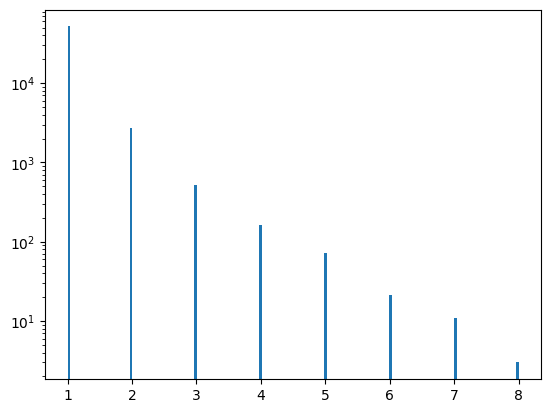

In [11]:
#Repeated questions histogram

plt.hist(qid.value_counts().values, bins = 160)
plt.yscale('log')
plt.show()

In [13]:
#Feature Engineering

new_df['q1_len'] = new_df['question1'].str.len()
new_df['q2_len'] = new_df['question2'].str.len()

In [14]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50


In [15]:
new_df['q1_num_words'] = new_df['question1'].apply(lambda row: len(row.split(" ")))
new_df['q2_num_words'] = new_df['question2'].apply(lambda row: len(row.split(" ")))
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57,12,15
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120,25,17
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146,12,30
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50,5,9


In [16]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
    return len(w1 & w2)

In [20]:
#Example for reference:
set(map(lambda word: word.lower().strip(), "I am poor but I want to invest.".split(" ")))

{'am', 'but', 'i', 'invest.', 'poor', 'to', 'want'}

In [21]:
new_df['word_common'] = new_df.apply(common_words, axis = 1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12,11
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57,12,15,7
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120,25,17,2
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146,12,30,0
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50,5,9,3


In [22]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
    return (len(w1) + len(w2))

In [26]:
new_df['word_total'] = new_df.apply(total_words, axis = 1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12,24,24
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57,12,15,23,23
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120,25,17,34,34
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146,12,30,32,32
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50,5,9,13,13


In [27]:
new_df['word_share'] = round(new_df['word_common']/new_df['word_total'], 2)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12,24,24,1.0
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57,12,15,23,23,1.0
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120,25,17,34,34,1.0
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146,12,30,32,32,1.0
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50,5,9,13,13,1.0


minimum characters 2
maximum characters 391
average num of characters 59


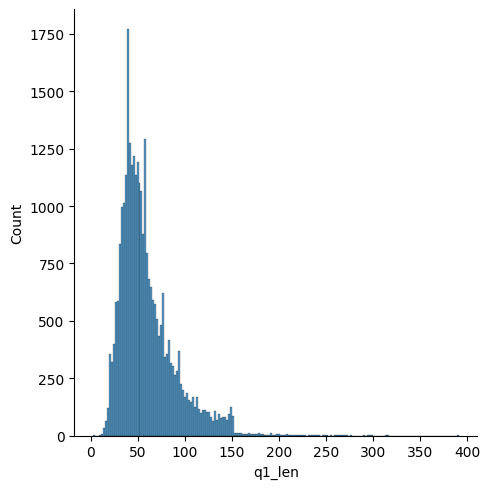

In [30]:
#Analysis of features

sns.displot(new_df['q1_len'])
print('minimum characters', new_df['q1_len'].min())
print('maximum characters', new_df['q1_len'].max())
print('average num of characters', int(new_df['q1_len'].mean()))

minimum characters 6
maximum characters 1151
average num of characters 60


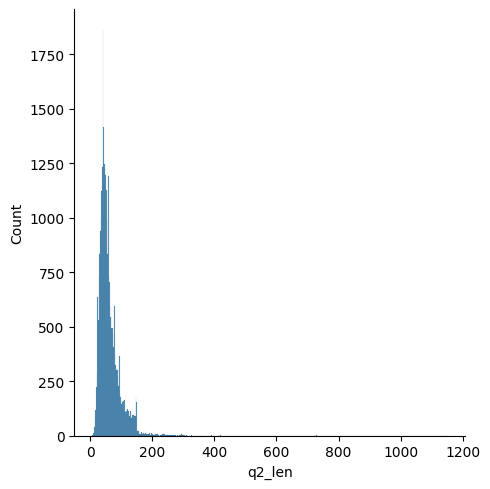

In [31]:
sns.displot(new_df['q2_len'])
print('minimum characters', new_df['q2_len'].min())
print('maximum characters', new_df['q2_len'].max())
print('average num of characters', int(new_df['q2_len'].mean()))

minimum words 1
maximum words 72
average num of words 10


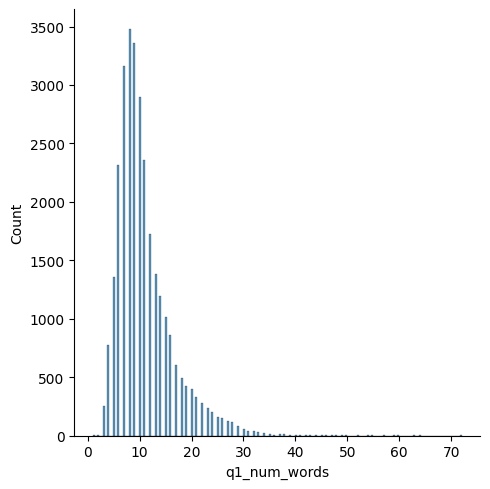

In [32]:
sns.displot(new_df['q1_num_words'])
print('minimum words',new_df['q1_num_words'].min())
print('maximum words',new_df['q1_num_words'].max())
print('average num of words',int(new_df['q1_num_words'].mean()))

minimum words 1
maximum words 237
average num of words 11


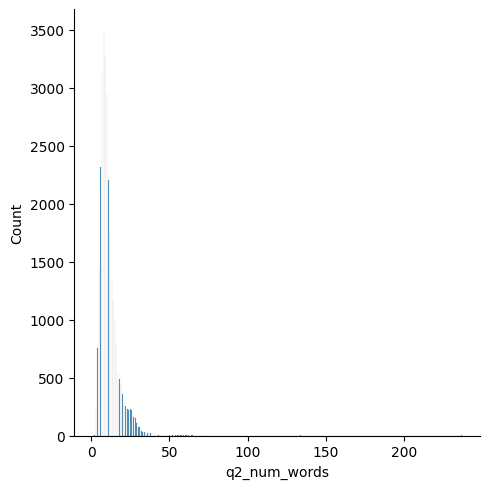

In [33]:
sns.displot(new_df['q2_num_words'])
print('minimum words',new_df['q2_num_words'].min())
print('maximum words',new_df['q2_num_words'].max())
print('average num of words',int(new_df['q2_num_words'].mean()))

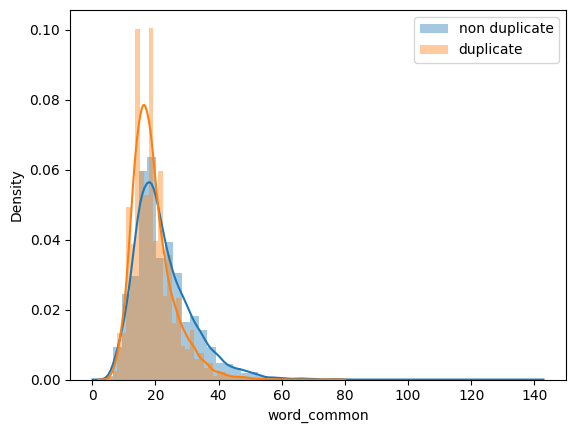

In [34]:
# common words
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_common'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_common'],label='duplicate')
plt.legend()
plt.show()

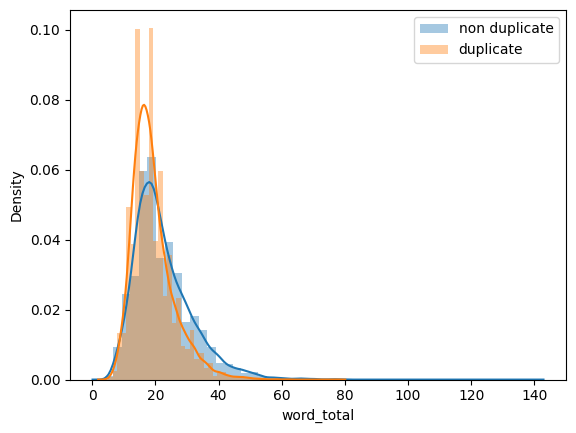

In [35]:
# total words
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_total'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_total'],label='duplicate')
plt.legend()
plt.show()

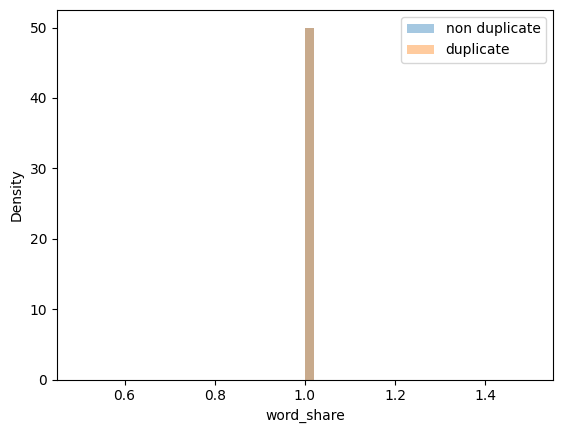

In [36]:
# word share
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_share'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_share'],label='duplicate')
plt.legend()
plt.show()

In [37]:
ques_df = new_df[['question1','question2']]
ques_df.head()

,question1,question2
398782,What is the best marketing automation tool for...,What is the best marketing automation tool for...
115086,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...
327711,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...
367788,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...
151235,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...


In [38]:
final_df = new_df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(30000, 8)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
398782,1,76,77,12,12,24,24,1.0
115086,0,49,57,12,15,23,23,1.0
327711,0,105,120,25,17,34,34,1.0
367788,0,59,146,12,30,32,32,1.0
151235,0,35,50,5,9,13,13,1.0


In [39]:
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [40]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(30000, 6000)

In [41]:
final_df = pd.concat([final_df, temp_df], axis=1)
print(final_df.shape)
final_df.head()

(30000, 6008)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,0,1,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
398782,1,76,77,12,12,24,24,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
115086,0,49,57,12,15,23,23,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
327711,0,105,120,25,17,34,34,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
367788,0,59,146,12,30,32,32,1.0,0,0,...,0,0,0,1,0,0,0,0,0,0
151235,0,35,50,5,9,13,13,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=1)

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7371666666666666

In [44]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
accuracy_score(y_test,y_pred)

0.7321666666666666

# Advanced Feature Engineering for Question Similarity

This project implements **advanced features** for analyzing the similarity between two questions. These features can be useful in tasks such as duplicate question detection, semantic similarity, or Natural Language Processing (NLP) projects.

---

## 📌 Features

### 1. Token Features
- **cwc_min**: Ratio of the number of common words to the length of the smaller question.  
- **cwc_max**: Ratio of the number of common words to the length of the larger question.  
- **csc_min**: Ratio of the number of common stop words to the smaller stop word count among the two questions.  
- **csc_max**: Ratio of the number of common stop words to the larger stop word count among the two questions.  
- **ctc_min**: Ratio of the number of common tokens to the smaller token count among the two questions.  
- **ctc_max**: Ratio of the number of common tokens to the larger token count among the two questions.  
- **last_word_eq**: Equals `1` if the last word in the two questions is the same, otherwise `0`.  
- **first_word_eq**: Equals `1` if the first word in the two questions is the same, otherwise `0`.  

---

### 2. Length-Based Features
- **mean_len**: Mean length of the two questions (number of words).  
- **abs_len_diff**: Absolute difference between the lengths of the two questions (number of words).  
- **longest_substr_ratio**: Ratio of the length of the longest common substring between the two questions to the length of the smaller question.  

---

### 3. Fuzzy Features
(Implemented using [fuzzywuzzy](https://github.com/seatgeek/fuzzywuzzy))  
- **fuzz_ratio**: `fuzz.ratio` score.  
- **fuzz_partial_ratio**: `fuzz.partial_ratio` score.  
- **token_sort_ratio**: `fuzz.token_sort_ratio` score.  
- **token_set_ratio**: `fuzz.token_set_ratio` score.  

---